## BÀI TẬP THỰC HÀNH TUẦN 04

Import thư viện

In [1]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [2]:
# Thiết lập seed để có kết quả nhất quán
random.seed(0)

'''
Hàm simulate_exam():
    * Hàm này mô phỏng kết quả của một lần kiểm tra. Trong mỗi lần kiểm tra, chúng ta lặp qua 10 câu hỏi.
    * Đối với mỗi câu hỏi, chúng ta chọn ngẫu nhiên một phương án từ 1 đến 4 (đại diện cho các lựa chọn A, B, C, D).
    * Nếu phương án được chọn là 1 (đại diện cho câu trả lời đúng), chúng ta tăng biến correct_answers lên 1.
    * Kết quả cuối cùng trả về là số câu đúng trong lần kiểm tra đó.
'''
def simulate_exam():
    correct_answers = 0
    
    for _ in range(10):
        selected_option = random.randint(1, 4)
        if selected_option == 1:
            correct_answers += 1
    
    return correct_answers


'''
Hàm calculate_probability():
    * Hàm này tính xác suất để sinh viên được 4 điểm sau 10 lần kiểm tra.
    * Chúng ta thực hiện mô phỏng 10,000 lần kiểm tra bằng cách gọi hàm simulate_exam() và đếm số lần mà sinh viên có đúng 4 câu trả lời.
    * Xác suất được tính bằng cách chia số lần thành công cho tổng số lần mô phỏng.
'''
def calculate_probability():
    total_simulations = 10000
    successful_simulations = 0
    
    for _ in range(total_simulations):
        correct_answers = simulate_exam()
        if correct_answers == 4:
            successful_simulations += 1
    
    probability = successful_simulations / total_simulations
    
    return probability


'''
Hàm calculate_expectation_and_variance():
    * Hàm này tính kỳ vọng (expectation) và phương sai (variance) của số câu trả lời đúng sau 10 lần kiểm tra.
    * Chúng ta thực hiện mô phỏng 10,000 lần kiểm tra và tính tổng số câu đúng và tổng bình phương số câu đúng.
    * Sau đó, kỳ vọng được tính bằng cách chia tổng số câu đúng cho số lần mô phỏng.
    * Phương sai được tính bằng cách lấy trung bình bình phương số câu đúng và trừ đi bình phương kỳ vọng.
'''
def calculate_expectation_and_variance():
    expectation = 0
    variance = 0
    total_simulations = 10000
    
    for _ in range(total_simulations):
        correct_answers = simulate_exam()
        expectation += correct_answers
        variance += correct_answers ** 2
    
    expectation /= total_simulations
    variance /= total_simulations
    variance -= expectation ** 2
    
    return expectation, variance


'''
In kết quả câu a, b, c
'''
print("--- In kết quả ---")
# a. Số câu đúng của sinh viên trong 10 lần kiểm tra
print("\na. Số câu đúng của sinh viên trong 10 lần kiểm tra")
for _ in range(10):
    correct_answers = simulate_exam()
    print(f"Số câu đúng: {correct_answers}")

# b. Xác suất để sinh viên được 4 điểm
print("\nb. Xác suất để sinh viên được 4 điểm")
probability = calculate_probability()
print(f"Xác suất được 4 điểm: {probability}")

# c. Tính E(X) và Var(X)
print("\nc. Tính E(X) và Var(X)")
expectation, variance = calculate_expectation_and_variance()
print(f"E(X): {expectation}")
print(f"Var(X): {variance}")

--- In kết quả ---

a. Số câu đúng của sinh viên trong 10 lần kiểm tra
Số câu đúng: 1
Số câu đúng: 3
Số câu đúng: 2
Số câu đúng: 4
Số câu đúng: 3
Số câu đúng: 2
Số câu đúng: 3
Số câu đúng: 2
Số câu đúng: 3
Số câu đúng: 3

b. Xác suất để sinh viên được 4 điểm
Xác suất được 4 điểm: 0.1434

c. Tính E(X) và Var(X)
E(X): 2.51
Var(X): 1.8805000000000014


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

Công thức tính xác suất của phân phối Poisson: $P(X=k) = \frac{{e^{-\lambda} \lambda^k}}{{k!}}$

Trong đó:

- e là số Euler (khoảng 2.71828).

- λ là tỷ lệ của sự kiện xảy ra (trong trường hợp này, là tỷ lệ của số cuộc gọi).

- k là số lần sự kiện xảy ra (trong trường hợp này, là số cuộc gọi).


Công thức này được sử dụng để tính xác suất của một số sự kiện cụ thể xảy ra trong một khoảng thời gian hoặc không gian với một tỷ lệ xác định.

Sau đó, chúng ta thực hiện ba trường hợp cụ thể:

- Tính xác suất nhận được 1 cuộc gọi (k1 = 1).

- Tính xác suất nhận được 2 cuộc gọi (k2 = 2).

- Tính xác suất nhận được 3 cuộc gọi (k3 = 3).

In [3]:
import math


'''
Hàm calculate_poisson_probability(rate, k):
    * Hàm này tính xác suất của biến ngẫu nhiên có phân phối Poisson với tỷ lệ (rate) là rate và giá trị k là k.
    * Kết quả trả về xác suất cần tìm
'''
def calculate_poisson_probability(rate, k):
    probability = (math.exp(-rate) * (rate**k)) / math.factorial(k)
    return probability

# Số cuộc gọi trong vòng một phút
rate = 3

# Xác suất nhận được 1 cuộc gọi
k1 = 1
probability_1_call = calculate_poisson_probability(rate, k1)
print(f"Xác suất nhận được 1 cuộc gọi: {probability_1_call}")

# Xác suất nhận được 2 cuộc gọi
k2 = 2
probability_2_calls = calculate_poisson_probability(rate, k2)
print(f"Xác suất nhận được 2 cuộc gọi: {probability_2_calls}")

# Xác suất nhận được 3 cuộc gọi
k3 = 3
probability_3_calls = calculate_poisson_probability(rate, k3)
print(f"Xác suất nhận được 3 cuộc gọi: {probability_3_calls}")

Xác suất nhận được 1 cuộc gọi: 0.14936120510359183
Xác suất nhận được 2 cuộc gọi: 0.22404180765538775
Xác suất nhận được 3 cuộc gọi: 0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

    Loại 1: trên 505 gam

    Loại 2: từ 495 – 505 gam

    Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_15672\3558430683.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p_type1 = 1 - (0.5 * (1 + np.math.erf((505 - mean) / np.sqrt(2 * variance))))
C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_15672\3558430683.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p_type2 = (0.5 * (1 + np.math.erf((505 - mean) / np.sqrt(2 * variance)))) - (0.5 * (1 + np.math.erf((495 - mean) / np.sqrt(2 * variance))))
C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_15672\3558430683.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p_type3 = 0.5 * (1 + np.math.erf((495 - mean) / np.sqrt(2 * variance)))



a. Tính tỷ lệ của mỗi loại
Tỷ lệ loại 1: 0.10564977366685535
Tỷ lệ loại 2: 0.7887004526662893
Tỷ lệ loại 3: 0.1056497736668553

b. Biểu đồ histogram trọng lượng trái cây


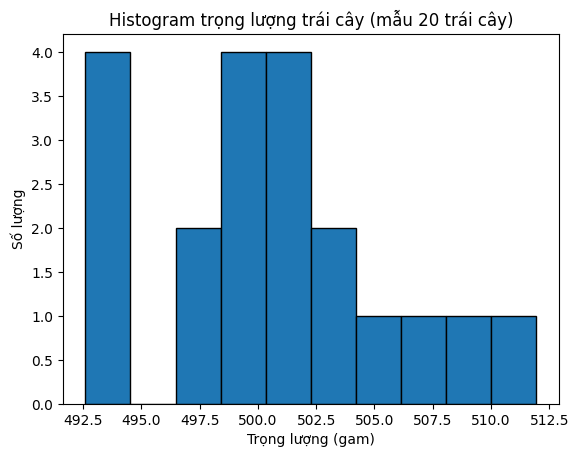

Giá trị trung bình từ mẫu 20 trái cây: 500.4698126527551
Độ lệch chuẩn từ mẫu 20 trái cây: 5.111212077770799

c. Biểu đồ histogram trọng lượng trái cây


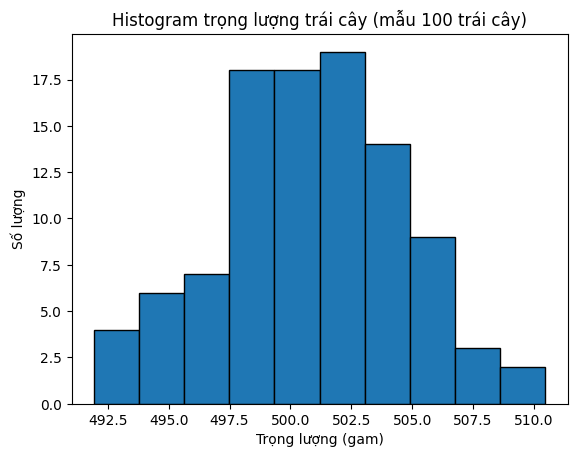

Giá trị trung bình từ mẫu 100 trái cây: 500.77832840858633
Độ lệch chuẩn từ mẫu 100 trái cây: 3.817229971739899
Nhận xét:
Khi lấy mẫu 20 trái cây, giá trị trung bình và độ lệch chuẩn có thể có độ biến động lớn hơn so với khi lấy mẫu 100 trái cây. Khi lấy mẫu lớn hơn, giá trị trung bình và độ lệch chuẩn xấp xỉ giá trị kỳ vọng và độ lệch chuẩn của phân phối chuẩn ban đầu.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Trọng lượng trái cây
mean = 500  # µ
variance = 16  # σ^2

# a. Tính tỷ lệ của mỗi loại trái cây
# Loại 1: trên 505 gam
p_type1 = 1 - (0.5 * (1 + np.math.erf((505 - mean) / np.sqrt(2 * variance))))

# Loại 2: từ 495 – 505 gam
p_type2 = (0.5 * (1 + np.math.erf((505 - mean) / np.sqrt(2 * variance)))) - (0.5 * (1 + np.math.erf((495 - mean) / np.sqrt(2 * variance))))

# Loại 3: dưới 495 gam
p_type3 = 0.5 * (1 + np.math.erf((495 - mean) / np.sqrt(2 * variance)))

print("\na. Tính tỷ lệ của mỗi loại")
print(f"Tỷ lệ loại 1: {p_type1}")
print(f"Tỷ lệ loại 2: {p_type2}")
print(f"Tỷ lệ loại 3: {p_type3}")

# b. Mô phỏng lấy mẫu 20 trái cây
sample_size_b = 20
sample_b = np.random.normal(mean, np.sqrt(variance), sample_size_b)

# Vẽ histogram trọng lượng trái cây
print("\nb. Biểu đồ histogram trọng lượng trái cây")
plt.hist(sample_b, bins=10, edgecolor='black')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.title('Histogram trọng lượng trái cây (mẫu 20 trái cây)')
plt.show()

# Tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
mean_b = np.mean(sample_b)
std_b = np.std(sample_b)

print(f"Giá trị trung bình từ mẫu 20 trái cây: {mean_b}")
print(f"Độ lệch chuẩn từ mẫu 20 trái cây: {std_b}")

# c. Mô phỏng lấy mẫu 100 trái cây
sample_size_c = 100
sample_c = np.random.normal(mean, np.sqrt(variance), sample_size_c)

# Vẽ histogram trọng lượng trái cây
print("\nc. Biểu đồ histogram trọng lượng trái cây")
plt.hist(sample_c, bins=10, edgecolor='black')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.title('Histogram trọng lượng trái cây (mẫu 100 trái cây)')
plt.show()

# Tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
mean_c = np.mean(sample_c)
std_c = np.std(sample_c)

print(f"Giá trị trung bình từ mẫu 100 trái cây: {mean_c}")
print(f"Độ lệch chuẩn từ mẫu 100 trái cây: {std_c}")

# d. Nhận xét về hai cách lấy mẫu
print("Nhận xét:")
print("Khi lấy mẫu 20 trái cây, giá trị trung bình và độ lệch chuẩn có thể có độ biến động lớn hơn so với khi lấy mẫu 100 trái cây. Khi lấy mẫu lớn hơn, giá trị trung bình và độ lệch chuẩn xấp xỉ giá trị kỳ vọng và độ lệch chuẩn của phân phối chuẩn ban đầu.")

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [7]:
import numpy as np

# Số lần mô phỏng tung xúc sắc
num_simulations = 5000


'''
a.  Để tính xác suất để số chấm xuất hiện là 4, 
    chúng ta đếm số lần xuất hiện giá trị 4 trong mảng dice_rolls 
    bằng cách sử dụng hàm np.count_nonzero 
    và chia cho tổng số lần mô phỏng num_simulations.
'''

# Tung xúc sắc cân đối đồng chất
dice_rolls = np.random.randint(1, 7, size=num_simulations)

# a. Xác suất để số chấm xuất hiện là 4
p_4 = np.count_nonzero(dice_rolls == 4) / num_simulations


'''
b.  Để tính xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4, 
    chúng ta đếm số lần xuất hiện giá trị lớn hơn hoặc bằng 4 
    trong mảng dice_rolls bằng cách sử dụng hàm np.count_nonzero 
    và chia cho tổng số lần mô phỏng num_simulations.
'''

# b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4
p_greater_than_or_equal_4 = np.count_nonzero(dice_rolls >= 4) / num_simulations


'''
c.  Để tính xác suất để mặt 6 chấm xuất hiện, 
    biết số chấm xuất hiện lớn hơn hoặc bằng 4, 
    chúng ta tạo một mảng rolls_greater_than_or_equal_4 
    chứa các giá trị trong dice_rolls lớn hơn hoặc bằng 4. 
    Sau đó, chúng ta đếm số lần xuất hiện giá trị 6 trong rolls_greater_than_or_equal_4 
    bằng cách sử dụng hàm np.count_nonzero 
    và chia cho độ dài của rolls_greater_than_or_equal_4.
'''

# c. Xác suất để mặt 6 chấm xuất hiện, biết số chấm xuất hiện lớn hơn hoặc bằng 4
rolls_greater_than_or_equal_4 = dice_rolls[dice_rolls >= 4]
p_6_given_greater_than_or_equal_4 = np.count_nonzero(rolls_greater_than_or_equal_4 == 6) / len(rolls_greater_than_or_equal_4)

'''
In kết quả ra màn hình
'''
print(f"a. Xác suất để số chấm xuất hiện là 4: {p_4}")
print(f"b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: {p_greater_than_or_equal_4}")
print(f"c. Xác suất để mặt 6 chấm xuất hiện, biết số chấm xuất hiện lớn hơn hoặc bằng 4: {p_6_given_greater_than_or_equal_4}")

a. Xác suất để số chấm xuất hiện là 4: 0.169
b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: 0.5
c. Xác suất để mặt 6 chấm xuất hiện, biết số chấm xuất hiện lớn hơn hoặc bằng 4: 0.346


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất


a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3
Min: 23
Max: 46
Q1: 33.0
Q2: 35.0
Q3: 37.0

b. Vẽ đồ thị boxplot


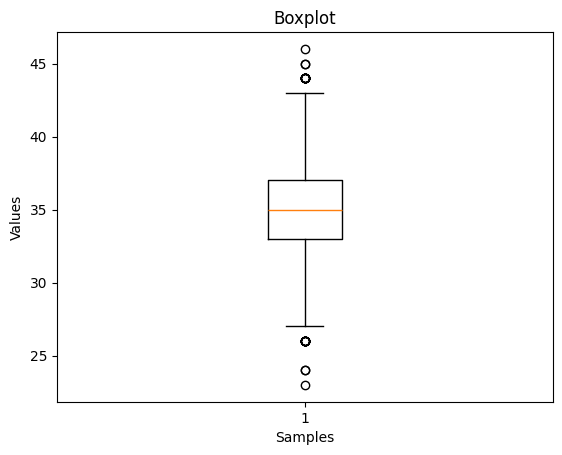


c. Vẽ các đồ thị tần số, tần suất


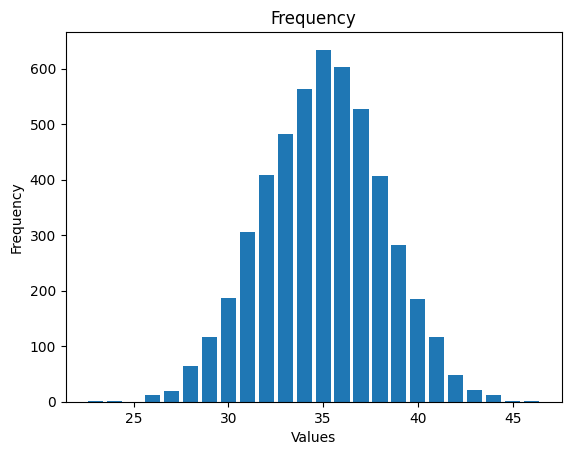

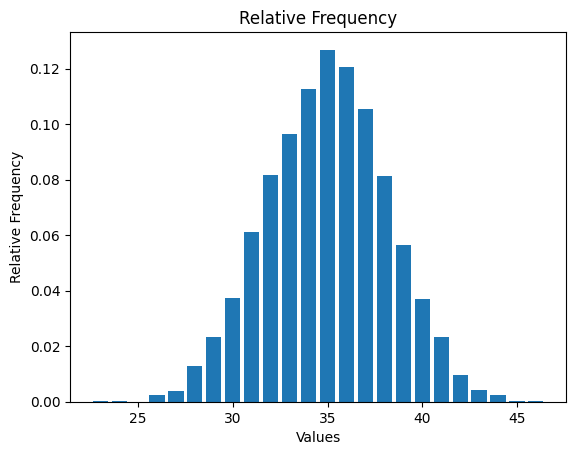

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Số lượng số ngẫu nhiên
num_samples = 5000

# Tham số phân phối nhị thức
n = 50
p = 0.7

# Tạo một mẫu ngẫu nhiên theo phân phối nhị thức
samples = np.random.binomial(n, p, size=num_samples)

# a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3
min_val = np.min(samples)
max_val = np.max(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 50)
q3 = np.percentile(samples, 75)

print("\na. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")

# b. Vẽ đồ thị boxplot
print("\nb. Vẽ đồ thị boxplot")
plt.boxplot(samples)
plt.title('Boxplot')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.show()

# c. Vẽ các đồ thị tần số, tần suất
print("\nc. Vẽ các đồ thị tần số, tần suất")
unique_vals, counts = np.unique(samples, return_counts=True)
frequency = counts / num_samples
plt.bar(unique_vals, counts)
plt.title('Frequency')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.bar(unique_vals, frequency)
plt.title('Relative Frequency')
plt.xlabel('Values')
plt.ylabel('Relative Frequency')
plt.show()